In [2]:
#필요 모듈 호출
import numpy as np #행렬 연산 패키지
from scipy import stats #과학 계산 패키지
import scipy.stats #통계 분석 패키지
import pandas as pd #데이터 패키지
import statsmodels.api as sm #통계 분석 패키지
import matplotlib.pyplot as plt #데이터 시각화 패키지
import seaborn as sns #데이터 시각화 패키지
from statsmodels.stats.proportion import proportions_ztest
import matplotlib
from numpy.random import rand


#주피터 노트북 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
#한글 폰트 (맑은 고딕) 적용
matplotlib.rc('font',family='Malgun Gothic')

# p.25 [실습] 기술통계 -1

In [3]:
#자동차 연비 Data Set에서 기술통계치 구하기
#시내에서 연비(mpg) 통계치 구하기: 구동방식, 평균, 중앙값, 표준편차, min, max, Q1, Q3
#연비 통계치 구하기: 구동 방식별 데이터 수, 평균, 중앙값, 표준편차, min, max, Q1, Q3
ds_mycars = pd.read_csv("/home/pirl/Downloads/mycars.csv", engine = "python") #파일 불러오기
ds_mycars.head() #파일 제대로 불려 왔는지 확인
df = ds_mycars[['automatic','mpg']] #표의 x축과 기준을 구동방식과 연비로 설정
df.groupby('automatic').describe().round(3) #표의 y축을 구동방식으로 설정

#파이썬을 이용하여 쉽고 간편하게 평균, 중앙 값, 데이터 수등 다양한 정보를 구할 수 있었다.
#파일을 불러와서 원하는대로 가공하는 법에 대해서 익힐 수 있었다.

mpg                                            
           count    mean    std  min   25%   50%   75%   max
automatic                                                   
auto       157.0  15.968  3.849  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675  4.488  9.0  15.0  18.0  21.0  35.0

# p.25 [실습] 기술통계 -2

In [4]:
#제품의 품질을 조사하여, 제품별 결함과 결함이 발생한 기간을 조사한 Table입니다. 범주형 데이터에 대해, counts, percents,
#cumulative counts, cumulative percents계산 바랍니다.
ds_mycars = pd.read_csv("/home/pirl/Downloads/mycars.csv", engine = "python") #파일 불러오기
ds_mycars.head() #파일 제대로 불려 왔는지 확인
df = ds_mycars[['highway_mileage','mpg']] #표의 x축과 기준을 고속도로와 연비로 설정
df.groupby('highway_mileage').describe().round(3) #표의 y축을 고속도로로 설정

#파이썬을 이용하여 쉽고 간편하게 평균, 중앙 값, 데이터 수등 다양한 정보를 구할 수 있었다.
#파일을 불러와서 원하는대로 가공하는 법에 대해서 익힐 수 있었다.

mpg                                               
                count    mean    std   min    25%   50%    75%   max
highway_mileage                                                     
12                5.0   9.000  0.000   9.0   9.00   9.0   9.00   9.0
14                2.0  11.000  0.000  11.0  11.00  11.0  11.00  11.0
15               10.0  11.000  0.000  11.0  11.00  11.0  11.00  11.0
16                7.0  11.857  0.900  11.0  11.00  12.0  12.50  13.0
17               31.0  13.161  1.186  11.0  13.00  13.0  14.00  15.0
18               10.0  12.800  1.033  12.0  12.00  12.5  13.00  15.0
19               13.0  14.077  0.862  13.0  13.00  14.0  15.00  15.0
20               11.0  15.000  0.894  14.0  14.00  15.0  16.00  16.0
21                2.0  15.000  0.000  15.0  15.00  15.0  15.00  15.0
22                7.0  15.857  0.900  15.0  15.00  16.0  16.50  17.0
23                7.0  16.000  1.000  15.0  15.50  16.0  16.00  18.0
24               13.0  16.692  0.947  15.0  16.00  17.0  17.00  18.0
25               15.0  17.333  1.676  15.0  16.00  17.0  19.00  20.0
26               32.0  18.000  1.191  16.0  17.75  18.0  19.00  21.0
27               14.0  19.214  1.188  17.0  18.25  19.0  20.00  21.0
28                7.0  19.286  0.756  18.0  19.00  19.0  20.00  20.0
29               22.0  20.636  1.293  18.0  21.00  21.0  21.00  23.0
30                4.0  22.000  1.414  21.0  21.00  21.5  22.50  24.0
31                7.0  21.286  0.951  20.0  21.00  21.0  21.50  23.0
32                4.0  24.000  0.816  23.0  23.75  24.0  24.25  25.0
33                2.0  26.000  2.828  24.0  25.00  26.0  27.00  28.0
34                1.0  26.000    NaN  26.0  26.00  26.0  26.00  26.0
35                2.0  26.000  0.000  26.0  26.00  26.0  26.00  26.0
36                2.0  24.500  0.707  24.0  24.25  24.5  24.75  25.0
37                1.0  28.000    NaN  28.0  28.00  28.0  28.00  28.0
41                1.0  29.000    NaN  29.0  29.00  29.0  29.00  29.0
44                2.0  34.000  1.414  33.0  33.50  34.0  34.50  35.0

# p.40 정규분포 이해하기

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


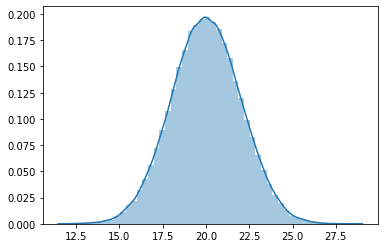

In [5]:
#Random Data생성: n = 100,000, x bar = 20, Standard Deviation = 2
#seed 선택을 하여 매번 실행 시 동일 한 값이 나오도록 설정
np.random.seed(seed=1234)

#평균:20, 표준편차:2, 데이터 수: 100,000의 정규분포로 따르는 데이터 생성
normal = np.random.normal(20,2,100000)

sns.distplot(normal)

# p.41 [실습] 정규분포 그리기

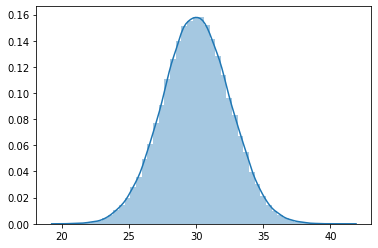

In [6]:
#Random Data생성: n = 100,000, x bar = 20, Standard Deviation = 2
normal2 = np.random.normal(30,2.5,100000)
sns.distplot(normal2)

#데이터 수를 10만개, 평균을 30, 표준 편차를 2.5로 잡은 정규분포이다
#정규 분포는 가운데(평균)을 기준으로 양옆으로 동일하다는 것을 인식하게 되었다.

# p.44 정규분포 확률계산

In [52]:
#A/S 작업을 수행하는데 걸리는 시간을 츩정해 본 결과 평균 115분, 표준편차 20분이 소요된다는 것을 알았음.
#만일 A/S 작업시간의 허용범위가 135분 이내라면 135분 이상 걸리는 A/S작업 비율은 어느 정도 일까요?
mu = 10
sigma = 20
x = 35
prob = stats.norm.cdf(x, mu, sigma)
print("{0}분 이상 걸리는 A/S 작업 비율:{1:.1f}%".format(x,(1-prob)*100))

35분 이상 걸리는 A/S 작업 비율:10.6%


# p.45 정규분포 확률계산

In [8]:
#대한민국 남성의 20~30대 키를 측정한 결과, 평균 175cm, 표준편차 5cm이다.
#나의 키가 180cm일 경우에 나는 몇 %범위에 위치할까요?
mu = 175
sigma = 5
x = 180
prob = stats.norm.cdf(x, mu, sigma)
print("나의 키가 {0}cm 이상일 경우에 나는 {1:.1f}%범위에 위치".format(x,(1-prob)*100))

나의 키가 180cm 이상일 경우에 나는 15.9%범위에 위치


# p.46 정규분포 확률계산

In [9]:
#어떤 자동차 1리터당 주행거리가 평균 12km, 표준편차 3km인 정규분포를 이룬다고하자. 
#1리터를 가지고 12km이상 15km이하를 달릴 확률은 얼마인가요?
mu = 12
sigma = 3
x = 15
prob = stats.norm.cdf(x, mu, sigma)
print("{0}km 이상 {1}km 이하를 달릴 확률은:{2:.1f}%에 해당함".format(mu,x,(prob-0.5)*100))

12km 이상 15km 이하를 달릴 확률은:34.1%에 해당함


# p.47 정규분포 확률계산

In [10]:
#어떤 자동차 1리터당 주행거리가 평균 12km, 표준편차 3km인 정규분포를 이룬다.
#1) 1리터를 가지고 9km이상 15km이하를 달릴 확률은 얼마인가요?
#2) 1리터를 가지고 15km이상을 달릴 확률은 얼마인가요?
mu = 12
sigma = 3
x = 15
x1 = 9
prob = stats.norm.cdf(x, mu, sigma)
prob1 = stats.norm.cdf(x1, mu, sigma)
print("{0}km 이상 {1}km 이하를 달릴 확률은:{2:.1f}%에 해당함".format(x1,x,(prob-prob1)*100))

#평균이 12, 표준편차가 3인 정규 분포에서 9부터 12에 해당하는 넓이가 답이다.
#구하고자 하는 오른쪽 끝 부분의 넓이에서 왼쪽 끝 부분의 넓이를 제거하면 가운데 값을 얻어낼 수 있음을 알게되었다.

9km 이상 15km 이하를 달릴 확률은:68.3%에 해당함


# p.53 표준정규분포 그리기

array([ 0.471, -1.191,  1.433, ...,  0.029, -1.221,  0.384])

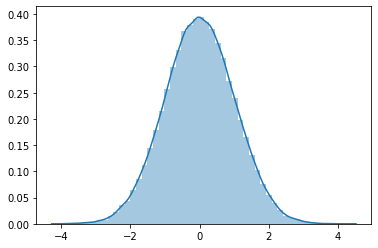

In [11]:
#Random Data 생성: n =100000, x bar = 0, Standard Deviation = 1
np.random.seed(1234)
#평균: 0, 표준편차:1, 데이터 수: 100,000의 정규분포를 따르는 데이터 생성
normal = np.random.normal(0,1,100000)
#histogram
sns.distplot(normal)

#데이터 확인, 소수점3
normal.round(3)

# p.57 표준정규분포 그리기

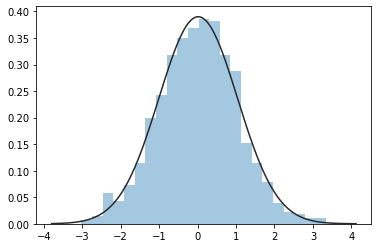

In [12]:
#Random Data생성: n = 100,000, xbar=0, Standard Deviation =1
np.random.seed(1234)
t_df29 = np.random.standard_t(df=29, size=1000)
sns.distplot(t_df29,fit=stats.norm,kde=False)

# p.58 실습 T분포

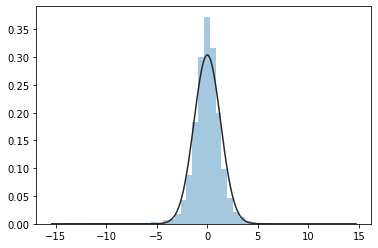

In [13]:
#Random Data생성: n = 100,000, degree of freedom = 5
#Random Data생성: n = 100,000, degree of freedom = 50
np.random.seed(1234)
t_df5 = np.random.standard_t(df=5, size=10000)
sns.distplot(t_df5,fit=stats.norm,kde=False)

# p.59 T분포

In [14]:
#확률변수 t는 자유도가 5인 t-분포를 따른다.
#t값이 1.53일 때, P(T<=t)을 계산하시오.
t = 1.53
df = 5
prob=stats.t.cdf(t,df)
print("P(T<=):{:.3f}".format(prob))



P(T<=):0.907


# p.60 T분포

In [15]:
#확률변수 t는 자유도가 100인 t-분포를 따른다.
#t값이 2.0일 때, P(T<=t)을 계산하시오.
t = 2.0
df = 100
prob=stats.t.cdf(t,df)
print("P(T<=):{:.3f}".format(prob))

P(T<=):0.976


# p.62 카이제곱 분포

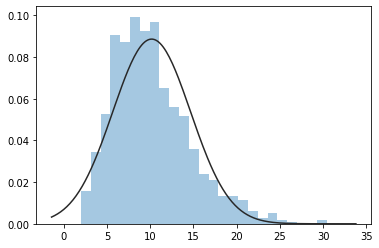

In [16]:
#Random Data생성: n = 100,000, degree of freedom = 5
#Random Data생성: n = 100,000, degree of freedom = 5
np.random.seed(seed=1234)
chisq_df10 = np.random.chisquare(df = 10, size = 1000)
sns.distplot(chisq_df10,fit=stats.norm,kde=False)

# p.63 카이제곱 분포

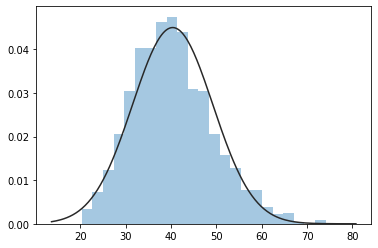

In [17]:
#p
np.random.seed(seed=1234)
chisq_df40 = np.random.chisquare(df = 40, size = 1000)
sns.distplot(chisq_df40,fit=stats.norm,kde=False)

# p.64

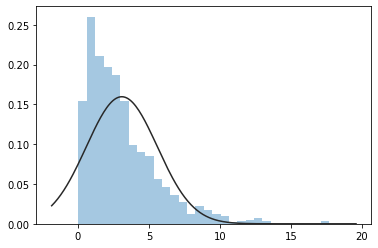

In [18]:
#p.64
np.random.seed(seed=1234)
chisq_df3 = np.random.chisquare(df = 3, size = 1000)
sns.distplot(chisq_df3,fit=stats.norm,kde=False)

# p.65

In [19]:
#p.65
chisq = 10
df = 30
prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}):{1:.4f}".format(chisq,prob))

P(X<=10):0.0002


# p.66

In [ ]:
#p.66
chisq = 3.0
df = 8
prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}):{1:.4f}".format(chisq,prob))

# p.69

In [ ]:
#p.69
np.random.seed(seed=1234)
F_df10_10 = np.random.f(dfnum=10, dfden=10, size=1000)
sns.distplot(F_df10_10, fit = stats.norm, kde = False)

# p.70

In [ ]:
#p.70
np.random.seed(seed=1234)
F_df10_10 = np.random.f(dfnum=100, dfden=100, size=1000)
sns.distplot(F_df10_10, fit = stats.norm, kde = False)

# p.71

In [ ]:
#p.71 [실습] F-분포-2
np.random.seed(seed=1234)
F_df10_50 = np.random.f(dfnum=10, dfden=50, size=100)
sns.distplot(F_df10_50, fit = stats.norm, kde = False)

#분자 자유도10, 분모 자유도50, 데이터 백개로 구성된 F분포이다.
#실제로, 분모의 자유도가 증가하여, 기존보다 정규분표 형태에 가까워졌다.
#이로서, 자유도이 상승이 곧 정규분포 형태로의 전환이라는 사실을 인식하게 되었다.

# p.72

In [ ]:
#p.72
f = 2.0
dfnum = 15
dfden = 15

prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X<=):{:.3f}".format(prob))
#F분포표에 의하면

# p.73

In [ ]:
#p.73 [실습] F-분포
f = 1.5
dfnum = 10
dfden = 100

prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X<=):{:.2f}".format(prob))

#기존 F-분포 값을 구하기 위해서는 F분포표에서 두개의 자유도와 F값을 고려하여 값 산출이 필요하였다.
#파이썬을 이용하니 결과를 구하는 시간이 큰 폭으로 줄어들었다.
#종형의 대칭분포가 아니다.

# p.76

In [ ]:
#p.76
x = 1500
alpha = 2.2
beta = 1200
prob = stats.weibull_min.cdf(x,alpha,scale = beta)
print("P(X<=x):{:.3f}".format(1-prob))

# p.77

In [ ]:
#p.77 [실습] Weibull분포
x = 2500
alpha = 5.2
beta = 2200
prob = stats.weibull_min.cdf(x,alpha,scale = beta)
print("P(X<=x):{:.3f}".format(1-prob))

#신뢰성 문제에 적용되는 분포이다.
#x와 형상모수, 척도모수를 전부 고려해야하므로 상당히 복잡한 분포이다.
#이상 작동해야 하므로, 오른쪽에 있는 넓이를 구해야하므로 전체에서 나머지 부분을 빼주었다.

# p.82

In [ ]:
#p.82
n = 3
for i in range(n+1):
    prob = stats.binom.pmf(k = i, n = n, p = 0.4)
    print("P(X={0})={1:.3f}".format(i, prob))

# p.84

In [34]:
#p.84 [실습] 이항분포
n = 5
for i in range(n+1):
    prob = stats.binom.pmf(k = i, n = n, p = 0.05)
    print("P(X={0})={1:.3f}".format(i, prob))
    
#특정한 횟수의 성공을 알고자 할때 사용하는 분포이다.
#5대의 차량을 선택해야 하므로, n에 5를주고, 불량 대수는 0대부터 5대까지 나올 수 있으므로 range에는 n+1을준다.
#확률p(0.3)에 의거하여 불량대수 x가 나올 확률을 구한다.
#불량대수 확률이 30%이므로, 상식적으로 생각했을때 1대가 나오는 것이 이상적이다.

P(X=0)=0.774
P(X=1)=0.204
P(X=2)=0.021
P(X=3)=0.001
P(X=4)=0.000
P(X=5)=0.000


# p.86

In [36]:
#p.86
mu = 2
prob = stats.poisson.pmf(3,mu)
cdf_prob = stats.poisson.cdf(2,mu)
print("1분당 {0}번의 전화가 걸려올 확률:{1:.1f}".format(3,prob*100))
print("1분당 최대 {0}회 이하의 전화가 걸려올 확률:{1:.1f}".format(2,cdf_prob*100))

1분당 3번의 전화가 걸려올 확률:18.0
1분당 최대 2회 이하의 전화가 걸려올 확률:67.7


# p.87

In [35]:
#p.87 [실습] 포아송분포
mu = 3
prob_1 = stats.poisson.pmf(2,mu)
prob_2 = stats.poisson.cdf(1,mu)
prob_3 = stats.poisson.cdf(3,mu)
print("{0}명의 손님이 도착할 확률:{1:.1f}".format(2,prob_1*100))
print("{0}명 이하의 손님이 도착할 확률:{1:.1f}".format(1,prob_2*100))
print("{0}명 이상의 손님이 도착할 확률:{1:.1f}".format(3,(1-prob_3)*100))

#일정 단위에서 발생한 성공 횟수를 알기 위해 사용하는 분포이다.
#평균 1시간에 3명씩 손님이 도착한다. 따라서, 10시에서 11시 사이라는 조건은 큰 의미가 없다.
#즉, 10시부터 11시 사이와 12시와 13시 사이에 발생할 사건의 확률이 동일하다는 의미이다.
#평균 한시간에 3명의 손님이 오므로, mu에 3을 주었다.
#2명의 손님이 도착해야 하므로 prob_1의 인자에 2를 주었다.
#1명 이하의 손님이 도착해야 하므로 prob_2의 인자에 1을 주었다.
#3명 이상의 손님이 도착해야하므로 prob_3의 인자에 3을 주고, 그것을 1에서 빼었다.
#1에서 prob_3을 빼준 이유는, prob_3은 3명 이하의 손님이 도착할 확률이기 때문이다.

2명의 손님이 도착할 확률:22.4
1명 이하의 손님이 도착할 확률:19.9
3명 이상의 손님이 도착할 확률:35.3


# p.104

In [38]:
#실습파일 camshaft 데이터 불러온다.
#변수 Supp1에 대해 정규성을 검정합니다.
ds_camshaft = pd.read_csv("/home/pirl/Downloads/camshaft.csv", engine = "python") #csv 파일 호출
ds_camshaft.head()

data1 = ds_camshaft['Supp1']
shapiro(data1)

NameError: name 'shapiro' is not defined

# p.105

In [39]:
#p.105 [실습] 정규성 검정
ds_camshaft = pd.read_csv("/home/pirl/Downloads/2sample_t_test.csv", engine = "python") #csv 파일 호출
ds_camshaft.head() #파일 정상 출력 확인

data1 = ds_camshaft['Mat_A']
data2 = ds_camshaft['Mat_B']
print(shapiro(data1))
print(shapiro(data2))
#두 가지 경우 전부 p값이 0.05이상이 나왔다.
#두 가지 경우 모두 정규분포를 따른다는 것을 알 수 있다.

NameError: name 'shapiro' is not defined

# p.107

In [40]:
#p.107
df = pd.DataFrame({"sample":[3.6,2.9,2.8,2.6,3.4,3.2,2.2,2.6,2.6,2.4,2.4,2.6,3.4,2.4,2.1,2.6,3.0,2.4,2.7,2.4,2.6,2.9,2.9,2.0,2.7,2.2,2.8,2.7,1.8,2.5,3.0,3.2,2.8,2.6,3.2,3.1,2.9,2.7,2.7,2.2]})
df.head()

lower,upper = stats.norm.interval(0.95,loc=np.mean(df),scale=0.397/np.sqrt(40))
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간: ([2.57],[2.82])


# p.108

In [41]:
#p.108 [실습] 모평균 구간추정_모표준편차를 아는 경우
df = pd.DataFrame({"sample":[18, 18, 20, 21, 20, 23, 19, 18, 17, 21, 22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})
#데이터를 직접 df에 넣는다.
df.head()
#입력한 데이터의 헤드부분을 출력하여 정상 출력되는지 확인한다.
lower,upper = stats.norm.interval(0.95,loc=np.mean(df),scale=3.8/np.sqrt(20))
#95%의 신뢰수준, 평균값, 3.8의 모표준편차/루트n을 인자로 넣는다.
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))
#신뢰수준 95%에서 모평균이 존재할 수 있는 범위가 17.83에서 21.17 사이이다.
#모표준편차가 주어져서 따로 계산할 필요가 없어서 과제 수행이 용이했다.

신뢰구간: ([17.83],[21.17])


# p.110

In [42]:
#p110
df = pd.DataFrame({"sample":[54.1,53.3,56.1,55.7,54.0,54.1,54.5,57.1,55.2,53.8,54.1,54.1,56.1,55.0,55.9,56.0,54.9,54.3,53.9,55.0]})
lower,upper = stats.t.interval(0.95,len(df)-1,loc=np.mean(df),scale=scipy.stats.sem(df))
print("신뢰구간:({0},{1})".format(lower.round(2),upper.round(2)))




신뢰구간:([54.39],[55.33])


# p.111

In [43]:
#p.111 [실습] 모평균 추정_모표준편차를 모르는 경우
df = pd.DataFrame({"sample":[73, 71, 74, 69, 70, 73, 70, 68, 75, 72, 70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})
#데이터를 직접 df에 넣는다.
lower,upper = stats.t.interval(0.95,len(df)-1,loc=np.mean(df),scale=scipy.stats.sem(df))
#95%의 신뢰수준, n-1, 평균, 모표준편차/루트n을 인자로 넣는다.
print("신뢰구간:({0},{1})".format(lower.round(2),upper.round(2)))
#신뢰수준 95%에서 모평균이 존재할 수 있는 범위가 70.6에서 72.4 사이이다.
#모표준편차가 주어지지 않아서 모표준편차를 따로 계산할 필요가 있어서 과제 수행이 보다 복잡했다.

신뢰구간:([70.6],[72.4])


# p.139

In [44]:
#p.139
df = pd.DataFrame({'sample':[74.5,81.2,73.8,82.0,76.3,75.7,80.2,72.6,77.9,82.8]})
t_result = stats.ttest_1samp(df,76.7)

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("1-Sample t-test")
print("t 통계량: {}".format(t))
print("p-value: {}".format(p))

1-Sample t-test
t 통계량: [0.864]
p-value: [0.41]


# p.140

In [ ]:
#p.140 [실습] 평균 검정(모집단 표준편차를 모르는 경우)
df = pd.DataFrame({'sample':[85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]})
t_result = stats.ttest_1samp(df,78.0)

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("1-Sample t-test")
print("t 통계량: {}".format(t))
print("p-value: {}".format(p))
#귀무가설: 개선활동이 만족도를 변화시키지 않았다.
#대립가설: 개선활동이 만족도를 변화시켰다.
#유의수준 5%에서 검정 결과 P값이 0.008이므로 개선활동이 만족도를 변화시켰다고 볼 수 있다.
#즉, 개선활동을 채택했다.

# p.146

In [ ]:
#p.146
df1 = pd.DataFrame({'sample':[6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7]})
df2 = pd.DataFrame({'sample':[7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})
plot_data = (df1, df2)

t_result = stats.ttest_ind(df1, df2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))
#유의 수준 5%에서 검정 결과 P값이 0.003이므로 고객간에 고객 만족도의 차이가 있다.

In [ ]:
#p.146 그래프
df1 = [6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7]
df2 = [7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]
plot_data = (df1, df2)
ax = plt.boxplot(plot_data)
plt.show()

# p.148

In [1]:
#p.148 [실습] Sample t-test
df1 = pd.DataFrame({'A':[1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344]}) #A 공급자
df2 = pd.DataFrame({'B':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.883]}) #B 공급자
df.boxplot(['A','B']) #그래프 그리기
plot_data = (df1, df2) #그래프 그리기

t_result = stats.ttest_ind(df1, df2) #Sample t-test 시행
t, p = t_result.statistic.round(3), t_result.pvalue.round(3) #시행값 저장

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

#그래프 그리기를 통해서, 데이터의 형태를 한눈으로 들여다 볼 수 있었다.
#귀무가설: 공급자 간에 모평균에 차이가 없다.
#대립가설: 공급자 간에 모평균에 차이가 있다.
#유의수준 5%에서 검정 결과 P값이 0.111이므로 공급자가 간에 모평균에 차이가 없다고 볼 수 있다.
#즉, 귀무가설을 채택했다.



NameError: name 'pd' is not defined

# p.149

In [ ]:
#p.149
df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({'after':[810,670,790,712,810,670,790,712,790,712]})

t_result = stats.ttest_rel(df1,df2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("Paired t-test")
print("t:{}".format(t))
print("p:{}".format(p))

# p.151

In [ ]:
#p.151 [실습] Paired t-test
df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]}) #before 데이터 생성
df2 = pd.DataFrame({'after':[710,580,787,712,750,600,782,670,790,680]})  #after 데이터 생성

t_result = stats.ttest_rel(df1,df2) #Paired t-test 수행
t,p = t_result.statistic.round(3), t_result.pvalue.round(3) #결과 값 저장

print("Paired t-test") #출력
print("t:{}".format(t))
print("p:{}".format(p))

#귀무가설: 성적이 학원을 가기전과 차이가 없다.
#대립가설: 성적이 학원을 가기전과 차이가 있다.
#p값이 0.05이므로 p<=0.05는 성립한다. 
#따라서, 성적이 학원을 가기전과 차이가 있다고 볼 수 있다.
#즉, 대립가설을 채택했다.

# p.155

In [ ]:
#p.155
count = 15
n_obs=100
value=0.1

stat,pval = proportions_ztest(count,n_obs,value)

print("1 Proprotion test")
print('z: {0:0.3f}'.format(stat))
print("p:{0:0.3f}".format(pval))

# p.157

In [10]:
#p.157
count = 40
n_obs=100
value=0.5

stat,pval = proportions_ztest(count,n_obs,value)

print("1 Proprotion test")
print('z: {0:0.3f}'.format(stat))
print("p:{0:0.3f}".format(pval))

1 Proprotion test
z: -2.041
p:0.041


# p.158

In [ ]:
#p.158
count = np.array([4,1])
nobs = np.array([1000,1200])

stat, pval = proportions_ztest(count, nobs)

print("2 Proprotion test")
print('z: {0:0.3f}'.format(stat))
print("p:{0:0.3f}".format(pval))

# p.160

In [ ]:
#p.160 [실습] Proprotion test
count = np.array([14,5]) #공장 A와 B의 불량품 갯수를 저장
nobs = np.array([1200,1200]) #공장 A와 B의 생산 갯수를 저장
#즉, 공장A는 1200개중 불량품이 14개, 공장B는 1200개중 불량품이 5개라는 뜻이다.

stat, pval = proportions_ztest(count, nobs) #Proportion test 실행

print("2 Proprotion test") #출력
print('z: {0:0.3f}'.format(stat))
print("p:{0:0.3f}".format(pval))

#귀무가설: 두 공정의 불량률에 차이가 없다.
#대립가설: 두 공정의 불량률에 차이가 있다.
#p값이 0.038이므로 p<0.05는 성립한다.
#즉, 두 공정의 불량률에 차이가 있다고 볼 수 있다.
#즉, 대립가설을 채택했다.

# p.166

In [ ]:
#p166
df = pd.DataFrame({'HSG':[270,260,236,234],'SS':[228,285,225,262],'SPA':[227,284,231,208]})
chi,pval,dof,expected = stats.chi2_contingency(df.T)

print("chi-squre test")
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value:\n{}'.format(expected.round(3)))

# p.168

In [ ]:
#p168 [실습] 카이제곱 검정
df = pd.DataFrame({'A':[18,1,8,7,10,9,10],'B':[8,2,14,5,5,9,4],'C':[4,1,3,4,9,5,4],'D':[4,1,2,3,2,7,3],'E':[3,1,3,1,1,1,1],'F':[3,25,8,10,2,1,7]})
#데이터 입력
chi,pval,dof,expected = stats.chi2_contingency(df.T) #chi-squre test실행

print("chi-squre test") #결과 출력
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))

#귀무가설: 각 제품에 대한 이미지에 대해 차이가 없다.
#대립가설: 각 제품에 대한 이미지에 대해 차이가 있다.
#p값이 0이므로 p<0.05는 성립한다.
#즉, 각 제품에 대한 이미지에 대해 차이가 있다고 볼 수 있다.
#즉, 대립가설을 채택했다.

# p.174

In [ ]:
#p.174
df = pd.DataFrame({'A':[892,623,721,678,723,790,720,670,690,771],
                   'B':[721,821,910,678,723,790,711,790,745,891],
                   'C':[621,915,888,721,894,834,841,912,845,889]})

df.boxplot(['A','B','C'])



# p.176

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


One-way
F통계량:4.172
p-value:0.019


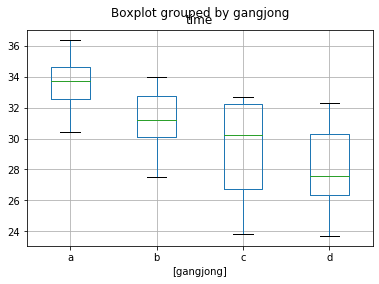

In [48]:
#p.176 [실습] One way ANOVA
ds_anova = pd.read_csv("/home/pirl/Downloads/ANOVA.csv", engine = "python") #데이터를 불러옴
df = ds_anova[['time','gangjong']]
df.boxplot(by = 'gangjong') #그래프 그리기(x축은 강종, y축은 시간을 갖음)

a = df['time'][df.gangjong=='a'] # a강종의 시간을 변수 a에 저장
b = df['time'][df.gangjong=='b'] # b강종의 시간을 변수 a에 저장
c = df['time'][df.gangjong=='c'] # c강종의 시간을 변수 a에 저장
d = df['time'][df.gangjong=='d'] # d강종의 시간을 변수 a에 저장

f_result = stats.f_oneway(a, b, c, d) #ANOVA 실행
f, p = f_result.statistic.round(3), f_result.pvalue.round(3) #결과값 저장
print("One-way") #출력
print("F통계량:{}".format(f))
print("p-value:{}".format(p))

#귀무가설: 강종별 2차정련 시간에 차이가 없다.
#대립가설: 강종별 2차정련 시간에 차이가 있다.
#p값이 0.019이므로 p<0.05는 성립한다.
#즉, 강종별 2차정련 시간에는 차이가 있다고 볼 수 있다.
#즉, 대립가설을 채택했다.

# p.181

In [24]:
#p181
df1 = [1,2,3,4,4,5,6,6,7,8]
df2 = [23,29,49,64,74,87,96,97,109,119]

corr, pval = stats.pearsonr(df1, df2)

print("Correlation Analysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value : {0:0.3f}'.format(pval))

Correlation Analysis
corr:0.989
p-value : 0.000


# p.183

In [20]:
#p.183 [실습] 상관분석
df1 = [37.6, 38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5] #강도 값 입력
df2 = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21] #온도 값 입력

corr, pval = stats.pearsonr(df1, df2) #Correlation Analysis 실행 및 변수 저장
 
print("Correlation Analysis") #결과 출력
print('corr:{0:0.3f}'.format(corr))
print('p-value : {0:0.3f}'.format(pval))

# 대립가설: 초코칩의 강도와 재료 반죽온도간에 매우 강한 상관성이 있다.
# p<0.05이므로, 초코칩의 강도와 재료 반죽온도간에는 매우 강한 상관성이 있다고 볼 수 있다.
# 즉, 대립가설을 채택한다.

Correlation Analysis
corr:-0.723
p-value : 0.000


# 추가문제

In [21]:
#본사에서는 대리점의 위치별(중심자, 시내, 쇼핑센터) 상품판매량에 차이가 있는지 검정하라(유의수준 5%)
df = pd.read_csv("/home/pirl/Downloads/storesales.csv", engine = "python", encoding = 'euckr')
formula='sales~C(weekday) + C(position) + C(weekday):C(position)'
lm = ols(formula, df).fit()
print(anova_lm(lm))


# PR(>F) 항목은 F검정통계량의 결과로 P값으로 볼 수 있다.
# weekday의 p값은 0.05보다 크므로, weekday와 상품판매량의 관계는 없다고 볼 수 있다.
# position의 p값은 0.05보다 작으므로,position과 상품판매량의 관계는 있다고 볼 수 있다.
# weekday와 position과의 교차 관계의 p값은 0.05보다 크므로, 서로 관계가 없다고 볼 수 있다.

NameError: name 'ols' is not defined

# p.204

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           1.95e-05
Time:                        17:30:14   Log-Likelihood:                -26.431
No. Observations:                  20   AIC:                             56.86
Df Residuals:                      18   BIC:                             58.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0013      4.184      3.108      

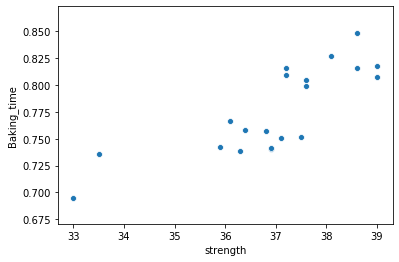

In [22]:
#p.204 [실습] 단순선형회귀
df = pd.DataFrame({'strength' : [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5],
'Baking_time' : [0.798922,0.84902,0.816163,0.758266,0.815894,0.807477,0.809068,0.7664,0.742243,0.751118,0.740629,0.751495,0.738863,0.827428,0.818172,0.740939,0.757128,0.804695,0.695121,0.735377]})

df.head()

sns.scatterplot(x='strength', y='Baking_time', data=df)

Baking = sm.add_constant(df['Baking_time'])
model = sm.OLS(df['strength'], Baking)
result = model.fit()

print(result.summary())

# 회귀식: 13.00013 + 30.8722*x / Baking_time의 P값은 유의미하다. / R-square 값은 0.646




# p.205

In [ ]:
#p.205
df_raw = pd.read_csv("/home/pirl/Downloads/직무능력평가.csv", engine = "python") #데이터를 불러옴
df_raw.head(3)

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
model = smf.ols(formula = "EVAL~DISSATIS", data=df_raw)

result = model.fit()
print(result.summary())

# p.207

In [23]:
#p.207 [실습] 단순선형회귀
df_raw = pd.read_csv("/home/pirl/Downloads/correaltion.csv", engine = "python") #데이터를 불러옴
df_raw.head(3)

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
model = smf.ols(formula = "strength~Oven_TMP", data=df_raw)

result = model.fit()
print(result.summary())

#회귀식은 strength = 30.419 + 0.0056 * Oven_TMP이다. 설명력은 R-Sq = 0.1%이다.
# R-square 값은 0.001으로 설명력이 낮은 편이다.
# 따라서, 초코칩의 강도와 오븐 온도와의 인과관계는 없다고 볼 수 있다.

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1136
Date:                Fri, 31 Jan 2020   Prob (F-statistic):              0.737
Time:                        17:31:20   Log-Likelihood:                -223.88
No. Observations:                  86   AIC:                             451.8
Df Residuals:                      84   BIC:                             456.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4190      5.271      5.771      0.0

In [25]:
#p.129
np.random.seed(1234)
df = pd.DataFrame(rand(10,2), columns = ['A','B'])
dfdf = pd.DataFrame({'소득수준' : [183, 213, 203],
'법안지지' : [154, 138, 110]})


,A,B
0,0.191519,0.622109
1,0.437728,0.785359
2,0.779976,0.272593
3,0.276464,0.801872
4,0.958139,0.875933
5,0.357817,0.500995
6,0.683463,0.712702
7,0.370251,0.561196
8,0.503083,0.013768
9,0.772827,0.882641


In [27]:
#p.207 [실습] 단순선형회귀

df1 = [182, 213, 203] #강도 값 입력
df2 = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]
df_raw = pd.read_csv("/home/pirl/Downloads/correaltion.csv", engine = "python") #데이터를 불러옴
df_raw.head(3)

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
model = smf.ols(formula = "strength~Oven_TMP", data=df_raw)

result = model.fit()
print(result.summary())

#회귀식은 strength = 30.419 + 0.0056 * Oven_TMP이다. 설명력은 R-Sq = 0.1%이다.
# R-square 값은 0.001으로 설명력이 낮은 편이다.
# 따라서, 초코칩의 강도와 오븐 온도와의 인과관계는 없다고 볼 수 있다.

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1136
Date:                Fri, 31 Jan 2020   Prob (F-statistic):              0.737
Time:                        17:34:25   Log-Likelihood:                -223.88
No. Observations:                  86   AIC:                             451.8
Df Residuals:                      84   BIC:                             456.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4190      5.271      5.771      0.0

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.172
Method:                 Least Squares   F-statistic:                    0.1183
Date:                Fri, 31 Jan 2020   Prob (F-statistic):              0.745
Time:                        18:01:49   Log-Likelihood:                -7.3525
No. Observations:                   7   AIC:                             18.71
Df Residuals:                       5   BIC:                             18.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5565      0.846      1.840      0.1

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


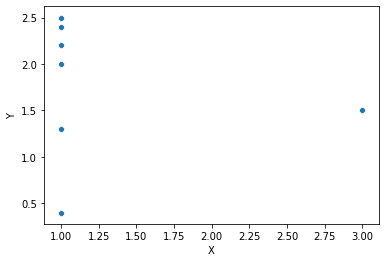

In [50]:
#p.204 [실습] 단순선형회귀
df = pd.DataFrame({'X' : [1,1,1,1,1, 1,3],
'Y' : [0.4, 1.3, 2.2, 2.5, 2.4, 2.0, 1.5]})

df.head()

sns.scatterplot(x='X', y='Y', data=df)

Baking = sm.add_constant(df['Y'])
model = sm.OLS(df['X'], Baking)
result = model.fit()

print(result.summary())

# 회귀식: 13.00013 + 30.8722*x / Baking_time의 P값은 유의미하다. / R-square 값은 0.646








                            OLS Regression Results                            
Dep. Variable:                   소득수준   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                 -0.440
Method:                 Least Squares   F-statistic:                    0.3888
Date:                Fri, 31 Jan 2020   Prob (F-statistic):              0.645
Time:                        17:55:25   Log-Likelihood:                -11.335
No. Observations:                   3   AIC:                             26.67
Df Residuals:                       1   BIC:                             24.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        248.2957     78.704      3.155      0.1

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/h

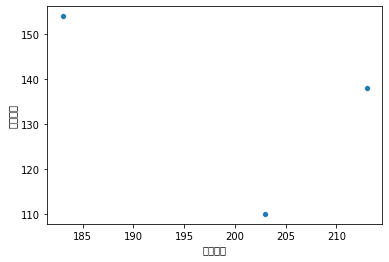

In [49]:
#p.204 [실습] 단순선형회귀
df = pd.DataFrame({'소득수준' : [183, 213, 203],
'법안지지' : [154, 138, 110]})

df.head()

sns.scatterplot(x='소득수준', y='법안지지', data=df)

Baking = sm.add_constant(df['법안지지'])
model = sm.OLS(df['소득수준'], Baking)
result = model.fit()

print(result.summary())

# 회귀식: 13.00013 + 30.8722*x / Baking_time의 P값은 유의미하다. / R-square 값은 0.646








In [ ]:
#p.176 [실습] One way ANOVA
df = pd.DataFrame({'소득수준' : [183, 213, 203],'법안지지' : [154, 138, 110]})

ds_anova = pd.read_csv("/home/pirl/Downloads/ANOVA.csv", engine = "python") #데이터를 불러옴
df = ds_anova[['time','gangjong']]
df.boxplot(by = 'gangjong') #그래프 그리기(x축은 강종, y축은 시간을 갖음)

a = df['time'][df.gangjong=='a'] # a강종의 시간을 변수 a에 저장
b = df['time'][df.gangjong=='b'] # b강종의 시간을 변수 a에 저장
c = df['time'][df.gangjong=='c'] # c강종의 시간을 변수 a에 저장
d = df['time'][df.gangjong=='d'] # d강종의 시간을 변수 a에 저장

f_result = stats.f_oneway(a, b, c, d) #ANOVA 실행
f, p = f_result.statistic.round(3), f_result.pvalue.round(3) #결과값 저장
print("One-way") #출력
print("F통계량:{}".format(f))
print("p-value:{}".format(p))

#귀무가설: 강종별 2차정련 시간에 차이가 없다.
#대립가설: 강종별 2차정련 시간에 차이가 있다.
#p값이 0.019이므로 p<0.05는 성립한다.
#즉, 강종별 2차정련 시간에는 차이가 있다고 볼 수 있다.
#즉, 대립가설을 채택했다.